In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()
#print(mnist.load_data())
x_train.shape

(60000, 28, 28)

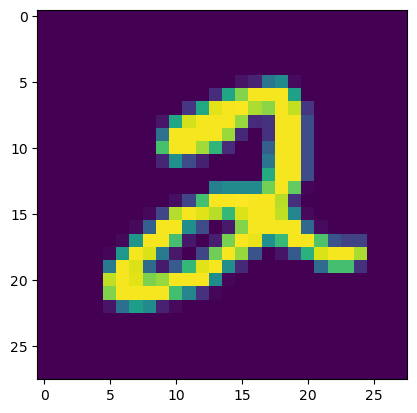

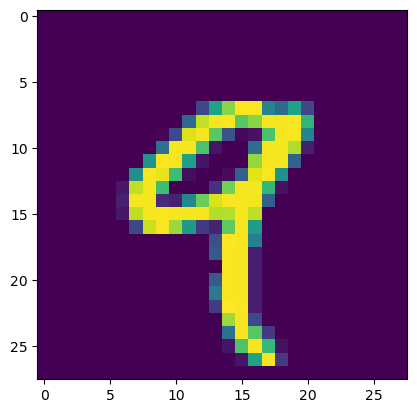

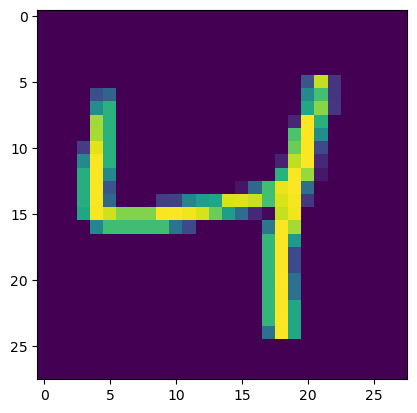

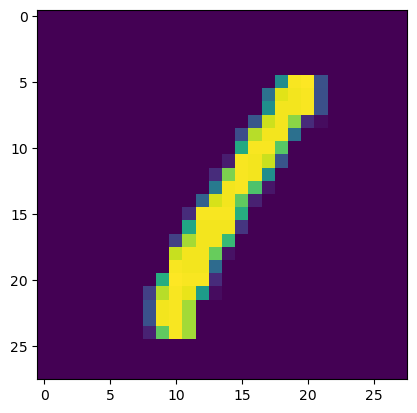

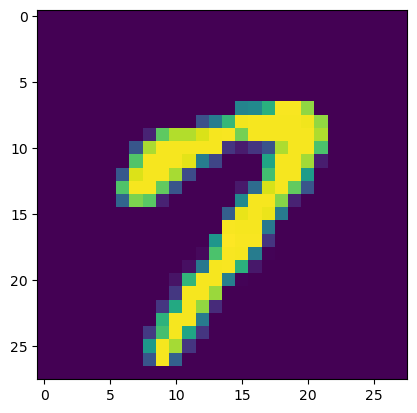

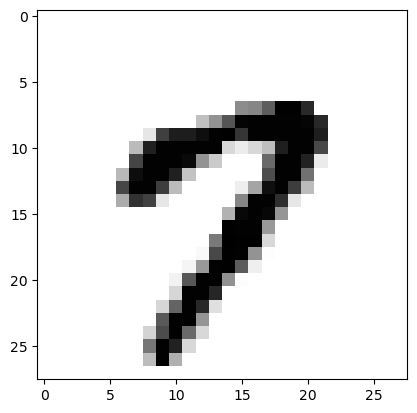

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.show()
plt.imshow(x_train[5] , cmap = plt.cm.binary)

plt.imshow(x_train[4])
plt.show()
plt.imshow(x_train[4] , cmap = plt.cm.binary)

plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[2] , cmap = plt.cm.binary)

plt.imshow(x_train[3])
plt.show()
plt.imshow(x_train[3] , cmap = plt.cm.binary)

plt.imshow(x_train[15])
plt.show()
plt.imshow(x_train[15] , cmap = plt.cm.binary)

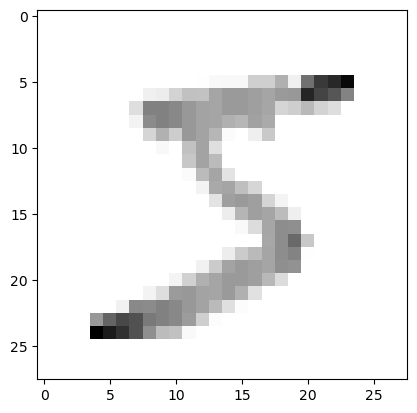

In [4]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [5]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
import numpy as np
img_size = 28

x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [9]:
# compile model that we have created for handwritten digit recognition project
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 10 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/10
329/329 [==============================] - 155s 465ms/step - loss: 0.3178 - accuracy: 0.9027 - val_loss: 0.0900 - val_accuracy: 0.9726
Epoch 2/10
329/329 [==============================] - 158s 482ms/step - loss: 0.0934 - accuracy: 0.9721 - val_loss: 0.0622 - val_accuracy: 0.9804
Epoch 3/10
329/329 [==============================] - 157s 477ms/step - loss: 0.0645 - accuracy: 0.9794 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 4/10
329/329 [==============================] - 151s 460ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0489 - val_accuracy: 0.9859
Epoch 5/10
329/329 [==============================] - 156s 474ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0457 - val_accuracy: 0.9864
Epoch 6/10
329/329 [==============================] - 181s 551ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0420 - val_accuracy: 0.9880
Epoch 7/10
329/329 [==============================] - 155s 472ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.0478 -

In [11]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

313/313 [==============================] - 10s 30ms/step - loss: 0.0364 - accuracy: 0.9891
Test loss on 10,000 test samples 0.03639601916074753
Validation Accuracy on 10,000 samples 0.9890999794006348


313/313 [==============================] - 10s 30ms/step
6


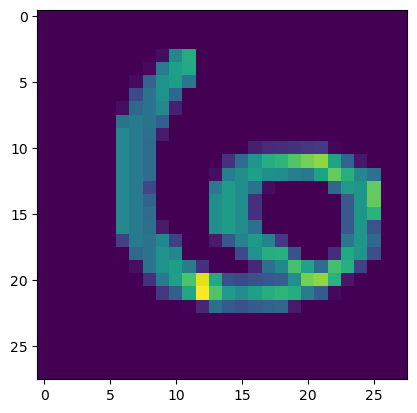

In [12]:
predictions = model.predict([x_tester])

print(np.argmax(predictions[54]))

plt.imshow(x_test[54])

In [13]:
import numpy as np
import cv2

#read
img = cv2.imread("C:\\Users\\alexa\\Pictures\\Screenshots\\docs1.png")
img = cv2.resize(img,(1143, 585))

#ROI
a1 = img[120:180,84:195]
b1 = img[120:182,195:307]
c1 = img[120:182,307:415]

b4 = img[305:366,194:307]
c4 = img[304:368,308:416]

#cv2.imshow("img", a1)
#cv2.imshow("img", b1)
cv2.imshow("img")
cv2.imshow("img", c4)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 76ms/step
6


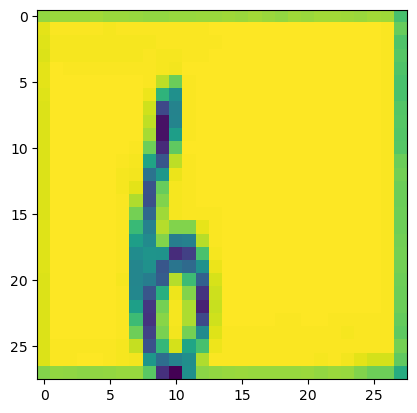

In [14]:
import cv2

#img = cv2.imread(a1)
img = a1
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(resize)

1/1 [==============================] - 0s 37ms/step
6


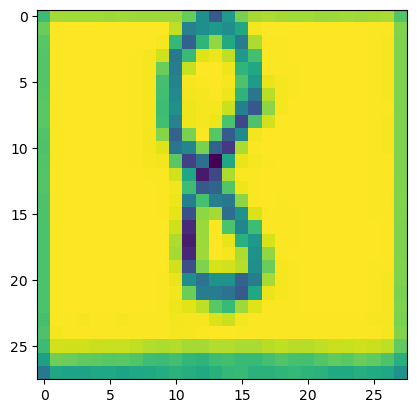

In [15]:
import cv2

#img = cv2.imread(b1)
img  = b1
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(img)
plt.imshow(resize)

1/1 [==============================] - 0s 16ms/step
6


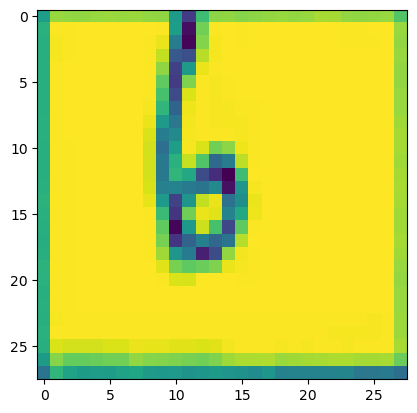

In [16]:
import cv2

#img = cv2.imread(r'C:\\Users\\alexa\\Downloads\\1.jpeg')
img  = c1
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(resize)

1/1 [==============================] - 0s 16ms/step
0


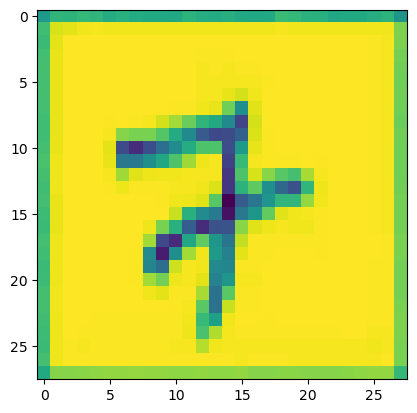

In [17]:
import cv2

#img = cv2.imread(r'C:\\Users\\alexa\\Downloads\\5_.jpeg')
img = b4
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(resize)

1/1 [==============================] - 0s 53ms/step
3


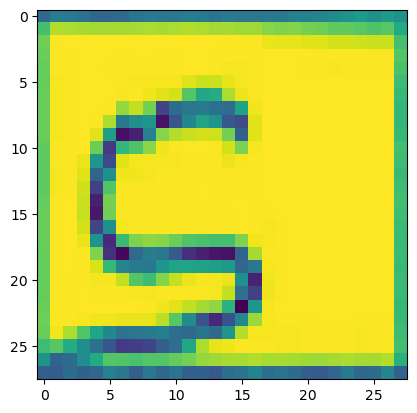

In [18]:
import cv2

#img = cv2.imread(r'C:\\Users\\alexa\\Downloads\\7_.jpeg')
img = c4
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(resize)

1/1 [==============================] - 0s 48ms/step
3


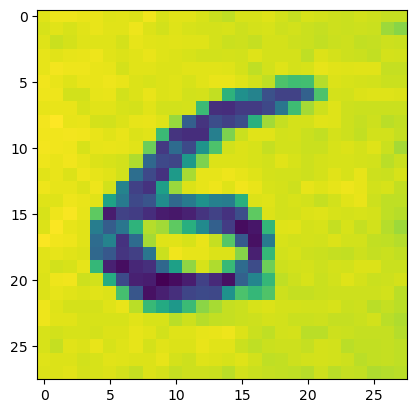

In [19]:
import cv2

img = cv2.imread(r'C:\\Users\\alexa\\Downloads\\6_.jpeg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(resize)

1/1 [==============================] - 0s 34ms/step
3


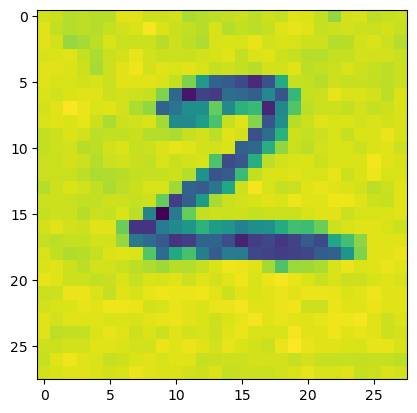

In [20]:
import cv2

img = cv2.imread(r'C:\\Users\\alexa\\Downloads\\2.jpeg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
#plt.imshow(new_img)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)

print(np.argmax(predictions))
#plt.imshow(gray)
#print("hi")
plt.imshow(resize)